#                                                                   Finance Minister Budget Speech Analysis

# Business Problem:

Project Description:
    
Ministry of Finance has a very major role to play in economic growth for a nation and it’s critical for the nation to fall in good hands. What if you could understand how well a Politician would do wearing a hat of a Finance Minister way before time. Wouldn’t that be fantastic? What’s available with us is budget speech data from the last decade. And would be interesting to know the following (and the list would grow even further):

Question:

- [ ] What was each minister’s financial focus? Was there a significant change in those sectors in the following year?
- [ ] Can you find out to what extent a finance minister makes fake commitment in the speech?
- [ ] Can you find similarities between the speeches from different ministers and hence find out persistent economical issues Ministry of Finance has been trying to solve        in the last Decade?
- [ ] Does the tone of the budget speech (Using information like Phrases used, sentiment, length, etc.) has a correlation with its possible outcome?
- [ ] Can you score each finance minister based on their effectiveness?
- [ ] Can you find the sectors that needs special attention but hasn’t been getting any?
- [ ] From the speeches, can we list down features required for someone to run a Ministry of Finance effectively?

Modules:
- [x] Data reading and cleaning
- [x] Exploratory Data Analysis, Feature engineering and Data Visualization– Mine features, summarize the speeches, visualize etc
- [x] Web Scrapping
- [x] Sentiment Prediction and Analysis
- [x] Topic Modelling
- [ ] Building a Text Classifier
- [ ] Building Dashboard using Tableau

External Mentor:

- [ ] download financial results data and compare between each budget year such as what is the improve / not to compare 2013 we need 2012 data
- [ ] summarize the speachs and find similarity between speach using sentiments and topics data available .

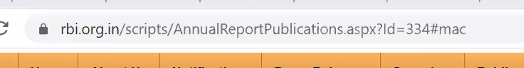


In [1]:
import pandas as pd
import numpy as np
import glob
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import tokenize
import tkinter
from tkinter.filedialog import askdirectory
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style

Check the present working directory 

In [3]:
%pwd

'F:\\IIM Course\\Project FM\\Text'

In [4]:
# If the present working directory is not the place where text files are there change to correct folder 

%cd F:/IIM Course/Project FM/Text

F:\IIM Course\Project FM\Text


In [5]:
# This will extract all .txt files from the above PWD
alltextfiles = glob.glob('*.txt') 

#check if all required files names are extracted
print(alltextfiles)

['201002 PM.txt', '201102 PM.txt', '201203 PM.txt', '201302 PC.txt', '201402 PC Int.txt', '201407 AJ.txt', '201502 AJ.txt', '201602 AJ.txt', '201702 AJ.txt', '201802 AJ.txt', '201902 PG Int.txt', '201907 NS.txt']


In [6]:
import re

In [7]:

df_files = pd.DataFrame(columns = ['Budget_Year-Month','Finance_Minister','Text'])

for filename in alltextfiles:
    
# Get the budget year and month from the filename
#  first get the text other than file extension then get the first word after spliting based on space
    year = filename.split(sep = '.')[0].split(sep = ' ')[0][:4]
    month = filename.split(sep = '.')[0].split(sep = ' ')[0][4:6]
    year_mon = year+'-'+str(int(year)+1)+' '+'Month'+'-'+month
    
    print(filename)
    with open(filename,'r')as f :
        data = f.read().strip()
        
# Anoter way of getting the budget year from the file 
#       year_mon = re.search('(?i)budget+\s+(\S+)\s+\n',data).group(1))

# Getting the finance minister from the file by finding the sentence 
#  starting with speech ending with minister 
        fm=re.search(r"(?i)(?:{})[\s\S]*?(?:{})([\s\S]*?)(?:{})"\
              .format('speech','of','minister'),\
               data).group(1).strip().replace('\n', ' ')

# Appending to Data frame 
        df_files = df_files.append({'Budget_Year-Month':year_mon ,'Finance_Minister':fm,'Text': data}, ignore_index=True)

201002 PM.txt
201102 PM.txt
201203 PM.txt
201302 PC.txt
201402 PC Int.txt
201407 AJ.txt
201502 AJ.txt
201602 AJ.txt
201702 AJ.txt
201802 AJ.txt
201902 PG Int.txt
201907 NS.txt


In [8]:
df_files.head()

,Budget_Year-Month,Finance_Minister,Text
0,2010-2011 Month-02,Pranab Mukherjee,Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...
1,2011-2012 Month-02,Pranab Mukherjee,Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...
2,2012-2013 Month-03,Pranab Mukherjee,Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...
3,2013-2014 Month-02,P. Chidambaram,Budget 2013-2014 \n\nSpeech of \n\nP. Chidamba...
4,2014-2015 Month-02,P. Chidambaram,Interim Budget 2014-2015 \n\nSpeech of \n\nP. ...


In [9]:
stop_nltk = stopwords.words("english")

stemmer_s = SnowballStemmer("english")

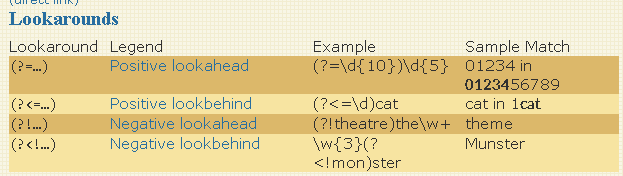

# Week 2-3 Task

- [X] 1.1 split tge text into sentences and create a dataframe
- [X] 1.2 Add sentiments to Each sentence
- [X] 1.3 Do a sector mapping 
- [X] 1.4 Understand NMF
- [X] 1.5 Create Topicsa

# 1.1 Spliting Text To Sentences

In [10]:

df_sent  = pd.DataFrame(columns = ['Budget_Year-Month','Finance_Minister','Sentance'])

for i,j,k in zip(df_files['Budget_Year-Month'] ,df_files['Finance_Minister'] ,df_files['Text']) :
    sentance = tokenize.sent_tokenize(k,'english')
    app_dict = {'Budget_Year-Month':i,'Finance_Minister':j,'Sentance':sentance[1:]}
    df_sent = df_sent.append(pd.DataFrame(app_dict))

In [11]:
new_words= ['india','budget', 'crore', 'lakh','nil','cent','year','fiscal','speaker','govern', 
            'propos','duti','sector','nation','propo','percent' ,'financ','estim' ,'rate','sum']

# ['tax',
#  'invest',
#  'custom',
#  'financ',
#  'growth',
#  'servic',
#  'increa',
#  'fund',
#  'develop',
#  'sum',
#  'scheme',
#  'estim',
#  'bank',
#  'hous',
#  'rate']
# for i in new_words:
#     stopwords.append(i)

In [14]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub(r"[^\w\s]","",result)
    tokens = word_tokenize(result1.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens \
               if len(term) > 2] 
    stemmed = [term for term in stemmed \
               if term not in new_words ]
    res = " ".join(stemmed)
    return res

In [15]:
df_sent.shape

(10379, 3)

In [16]:
df_sent['Sentance']= df_sent.Sentance.apply(clean_txt)

In [17]:
df_sent.head(4)

,Budget_Year-Month,Finance_Minister,Sentance
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...
3,2010-2011 Month-02,Pranab Mukherjee,


In [18]:
df_sent['Sentance'].replace('', np.nan,inplace = True)

In [19]:
df_sent.Sentance.isnull().sum()

1071

In [20]:
df_sent.dropna(subset=['Sentance'], inplace=True)

In [21]:
df_sent.head(5)

,Budget_Year-Month,Finance_Minister,Sentance
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...
4,2010-2011 Month-02,Pranab Mukherjee,was not clear also the polici maker mani other...
5,2010-2011 Month-02,Pranab Mukherjee,what would it impact the growth momentum the i...


# 1.2 Finding Polarity of sentences

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Naseer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
analyzer = SentimentIntensityAnalyzer()

df_sent['Polarity'] = [analyzer.polarity_scores(x)['compound'] for x in df_sent['Sentance']]

In [25]:
def cateogry_value(scores):
    if scores >= 0.05:
        result = "Positive"
    elif scores <= -0.05:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [26]:
df_sent['sentiment'] = df_sent.Polarity.apply(cateogry_value)

In [27]:
df_sent.head(5)

,Budget_Year-Month,Finance_Minister,Sentance,Polarity,sentiment
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...,-0.3818,Negative
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...,-0.0772,Negative
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...,-0.2732,Negative
4,2010-2011 Month-02,Pranab Mukherjee,was not clear also the polici maker mani other...,-0.2924,Negative
5,2010-2011 Month-02,Pranab Mukherjee,what would it impact the growth momentum the i...,0.3818,Positive


In [28]:
df_sent.sentiment.value_counts()

Neutral     5137
Positive    3413
Negative     758
Name: sentiment, dtype: int64

# 1.3 sector mapping 

In [29]:
sector_dict= {"Agriculture": ['agriculture','gricultural','gro','budget','product'],
               "Industry" : ['manufacturing','automobile','manufacture','production'],
               "Services" : ['information technology','banking'],
               "Social" :['health care','education','skills','job creation']}

In [30]:
def sector_mapping(sentance):
    sectors  = 'Others'
    for sector in sector_dict:
        keywords = sector_dict[sector]
        for word in keywords:
            if word in sentance:
                sectors = sector
            else :
                continue
    return sectors

In [31]:
# find sectors for each sentance
df_sent['Sector'] = df_sent['Sentance'].apply(lambda x : sector_mapping(x))

In [32]:
display(df_sent.head())

,Budget_Year-Month,Finance_Minister,Sentance,Polarity,sentiment,Sector
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...,-0.3818,Negative,Others
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...,-0.0772,Negative,Agriculture
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...,-0.2732,Negative,Agriculture
4,2010-2011 Month-02,Pranab Mukherjee,was not clear also the polici maker mani other...,-0.2924,Negative,Others
5,2010-2011 Month-02,Pranab Mukherjee,what would it impact the growth momentum the i...,0.3818,Positive,Agriculture


In [33]:
df_sent.Sector.value_counts()

Others         8586
Agriculture     679
Social           39
Industry          4
Name: Sector, dtype: int64

# 1.4 Topic Modeling

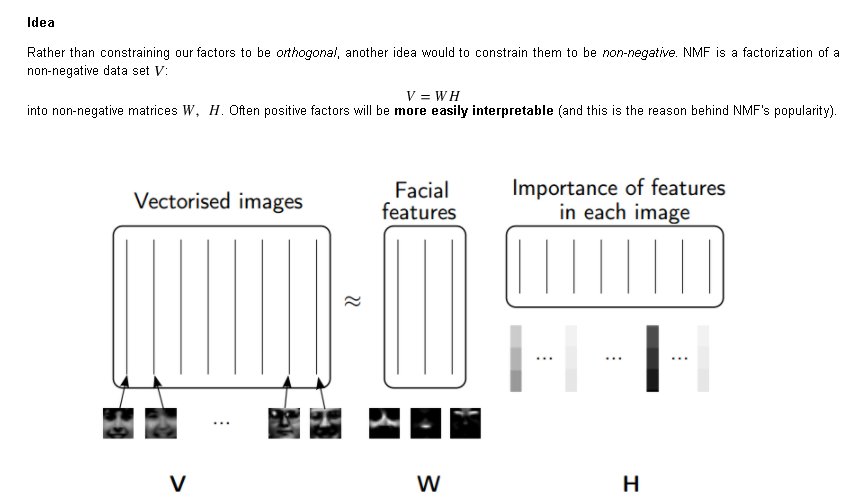

# For our dataset 

 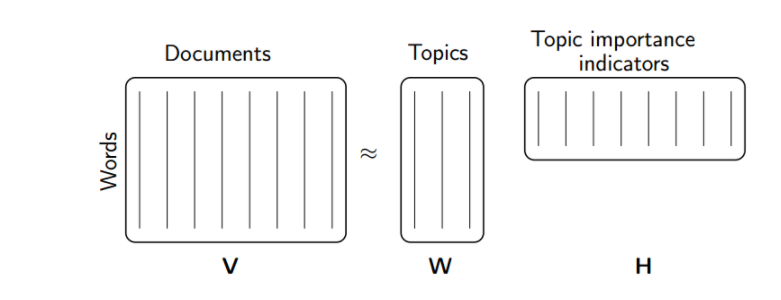

In [34]:
#Rows represnt documents , columns words 

In [35]:
# convert the text to a tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sent.Sentance)
idx_to_word = np.array(vectorizer.get_feature_names())

In [36]:
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf.insert(0,'Document',df_sent.Sentance.values)
tfidf

,Document,0001,001,0017,01012017,01032015,01032016,01042001,01042013,01042015,...,ééêkée,ééêéãééå,ééò,éêbéeªéé,éênjéé,éênjééªéé,éêxééàéªéé,éêàéãéä,éêãéa,éêée
0,2009 when present the interim februari and the...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,growth had start deceler and the busi sentimen...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,the economi capac sustain high growth was unde...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,was not clear also the polici maker mani other...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,what would it impact the growth momentum the i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,servic old age home run central state entiti r...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9304,servic pension system nps trust it member agai...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9305,rehabilitationtherapycounsel servic rehabilit ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9306,admiss circus danc theatr etc have admiss tick...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# apply NMF
 
nmf = NMF(n_components=10, solver="mu")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
topics = []
for i, topic in enumerate(H):
   
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))
    topics.append(idx_to_word[topic.argmax()])

Topic 1: case,compani,taxpay,provid,revenu,shall,indirect,direct,incom,tax
Topic 2: programm,farmer,100,plan,expenditur,initi,set,provid,increas,alloc
Topic 3: good,specifi,cvd,import,reduc,manufactur,exempt,basic,excis,custom
Topic 4: exempt,cenvat,way,01042016,input,effect,good,credit,agricultur,servic
Topic 5: infrastructur,domest,indian,manufactur,need,polici,foreign,economi,growth,invest
Topic 6: long,addit,mutual,project,corpus,rural,develop,provid,infrastructur,fund
Topic 7: capitalis,provid,reserv,recapitalis,compani,credit,account,capit,public,bank
Topic 8: allow,effect,incom,shall,provis,deduct,incometax,section,amend,act
Topic 9: intern,economi,httpindiabudgetnicin,legisl,reform,skill,current,inclus,develop,financi
Topic 10: loan,extend,announc,benefit,pension,central,implement,new,hous,scheme


In [38]:
topics

['tax',
 'alloc',
 'custom',
 'servic',
 'invest',
 'fund',
 'bank',
 'act',
 'financi',
 'scheme']

In [39]:
topics

['tax',
 'alloc',
 'custom',
 'servic',
 'invest',
 'fund',
 'bank',
 'act',
 'financi',
 'scheme']

In [40]:
for i in df_sent.index:
    df_sent.at[i, 'Topic'] = topics[W[i].argmax()]

In [41]:
df_sent

,Budget_Year-Month,Finance_Minister,Sentance,Polarity,sentiment,Sector,Topic
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...,-0.3818,Negative,Others,invest
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...,-0.0772,Negative,Agriculture,invest
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...,-0.2732,Negative,Agriculture,invest
4,2010-2011 Month-02,Pranab Mukherjee,was not clear also the polici maker mani other...,-0.2924,Negative,Others,invest
5,2010-2011 Month-02,Pranab Mukherjee,what would it impact the growth momentum the i...,0.3818,Positive,Agriculture,invest
...,...,...,...,...,...,...,...
993,2019-2020 Month-07,Nirmala Sitharaman,servic old age home run central state entiti r...,0.0000,Neutral,Others,financi
994,2019-2020 Month-07,Nirmala Sitharaman,servic pension system nps trust it member agai...,0.5106,Positive,Others,alloc
995,2019-2020 Month-07,Nirmala Sitharaman,rehabilitationtherapycounsel servic rehabilit ...,0.0000,Neutral,Others,fund
996,2019-2020 Month-07,Nirmala Sitharaman,admiss circus danc theatr etc have admiss tick...,0.0000,Neutral,Others,tax


In [42]:
df_sent[df_sent.Finance_Minister == 'Pranab Mukherjee'].Topic.value_counts()

alloc      634
invest     350
custom     265
financi    204
tax        170
servic     155
bank       153
scheme     149
act        112
fund        84
Name: Topic, dtype: int64

In [43]:
df_sent[df_sent.Finance_Minister == 'P. Chidambaram'].Topic.value_counts()

alloc      359
invest     183
financi    104
scheme      96
custom      95
bank        90
servic      64
tax         57
fund        54
act         47
Name: Topic, dtype: int64

In [44]:
df_sent[df_sent.Finance_Minister == 'Nirmala  Sitharaman'].Topic.value_counts()

alloc      262
invest     130
custom      93
financi     82
scheme      63
bank        61
servic      55
tax         49
fund        40
act         37
Name: Topic, dtype: int64

In [45]:
df_sent.Finance_Minister.value_counts()

Arun Jaitley           4590
Pranab Mukherjee       2276
P. Chidambaram         1149
Nirmala  Sitharaman     872
Piyush Goyal            421
Name: Finance_Minister, dtype: int64

In [46]:
df_sent.to_csv(r'final2.csv',index = False)

# Week 4 
- [X] EDA

In [47]:
from wordcloud import WordCloud

In [48]:
# Get the word cloud:
# .[] 1. combine all the reviews into a single string
# 2. instantiate word cloud
# 3. generate the word cloud

In [49]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
%matplotlib inline

In [50]:
def word_cloud1(text,year):
    word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
            generate(text)
    plt.figure(figsize=[6,6])
    plt.title(year)
    plt.imshow(word_cloud)
    plt.show()

In [51]:
def freq_dist(text):
    all_terms = text.split(" ")
    fdist = FreqDist(all_terms)
    df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])
    df_dist.sort_values(ascending=False, by="freq").head(25).\
    plot.bar(x= "words", y= "freq",figsize=(20,5)) 

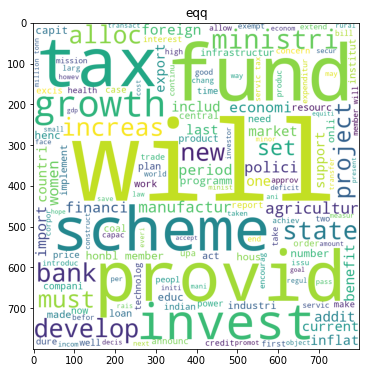

In [52]:
test =  " ".join(df_sent[(df_sent.Finance_Minister == "P. Chidambaram")].Sentance.values)
word_cloud1(test,'eqq')

In [53]:
def file(file):
    text = " ".join(df_sent[(df_sent.Finance_Minister == file['Finance_Minister'])& (df_sent['Budget_Year-Month'] == file['Budget_Year-Month'])].Sentance.values)
    word_cloud1(text,file['Budget_Year-Month'])
    freq_dist(text)

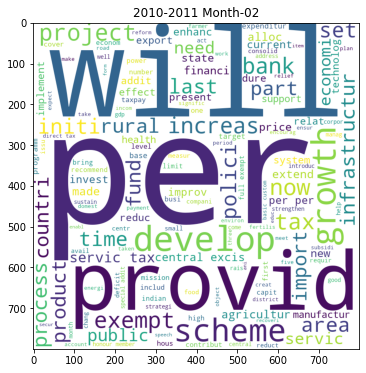

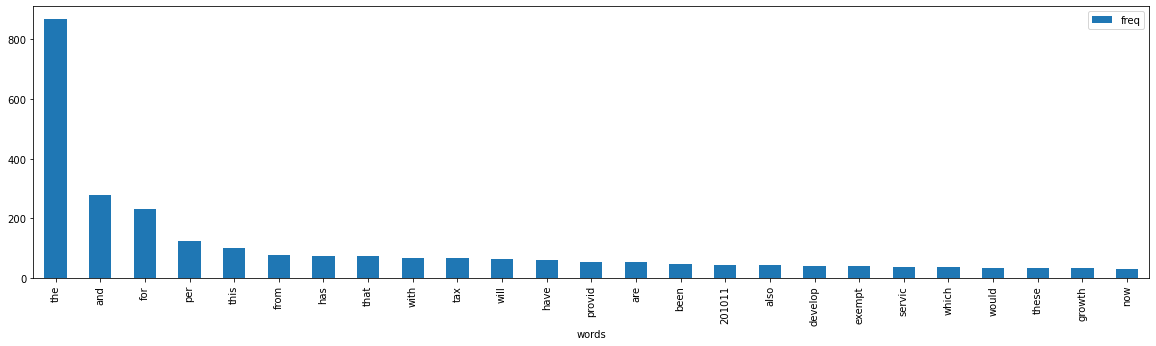

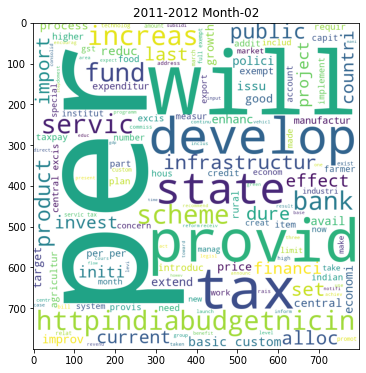

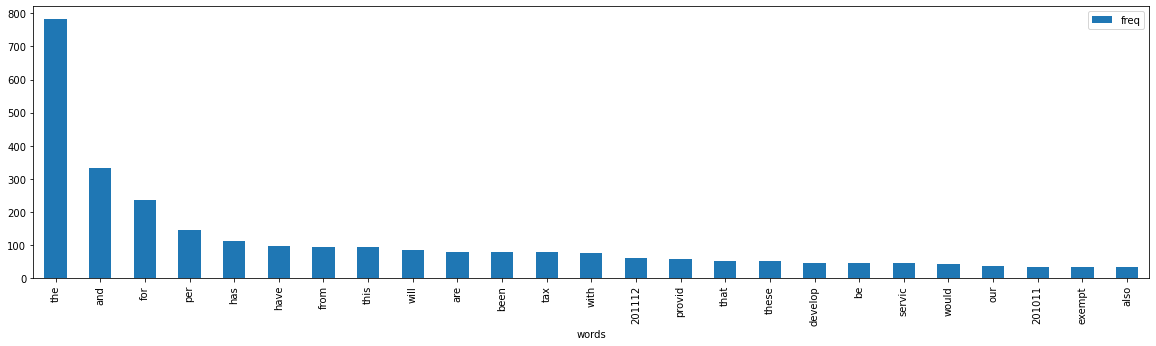

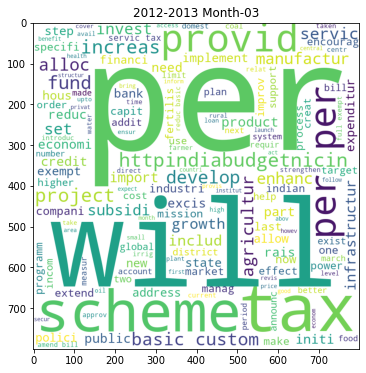

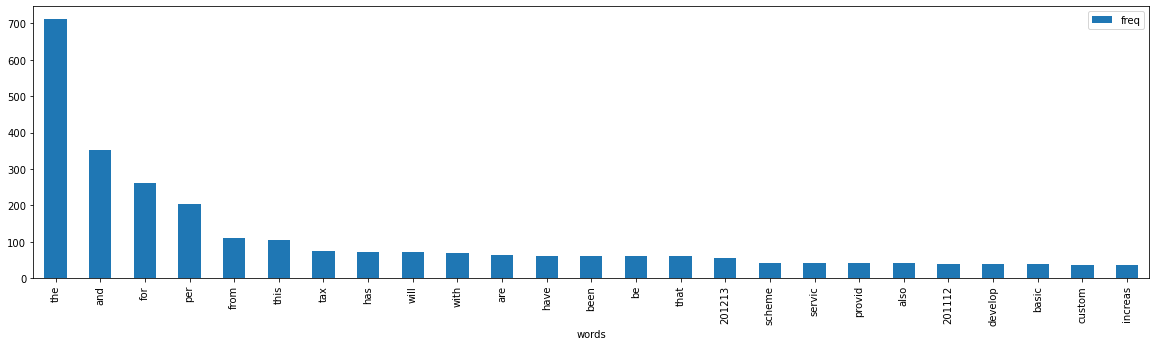

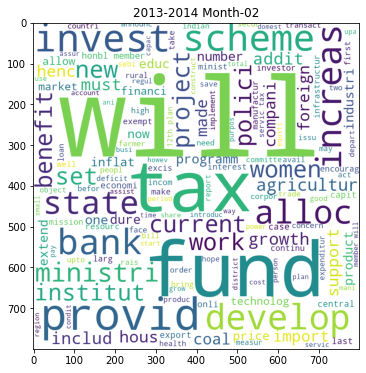

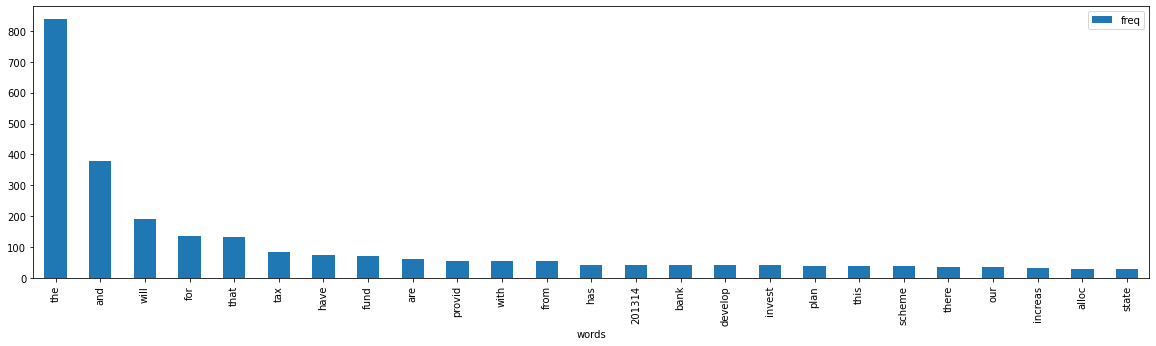

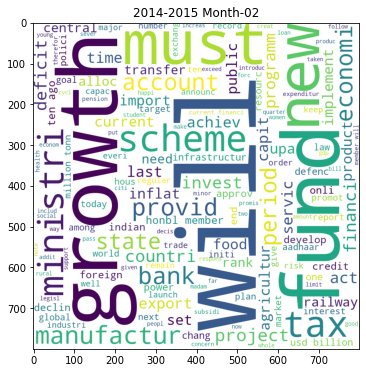

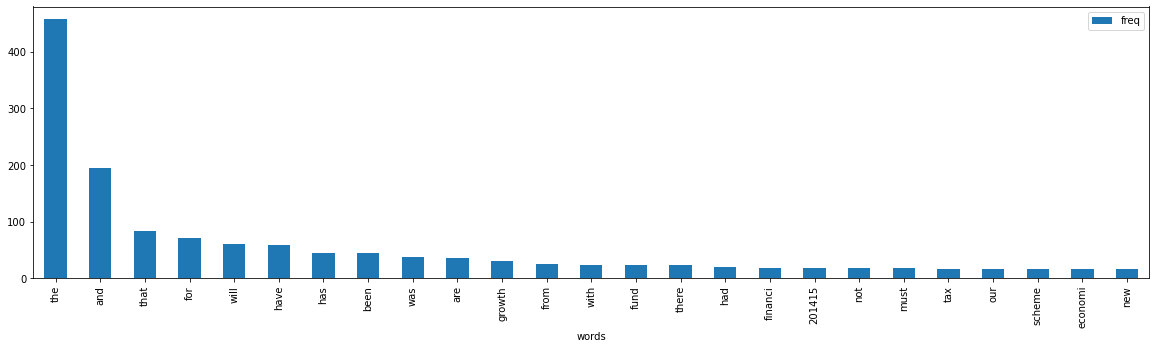

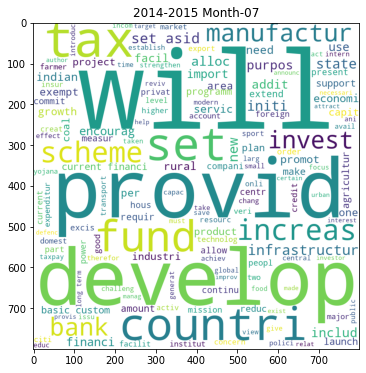

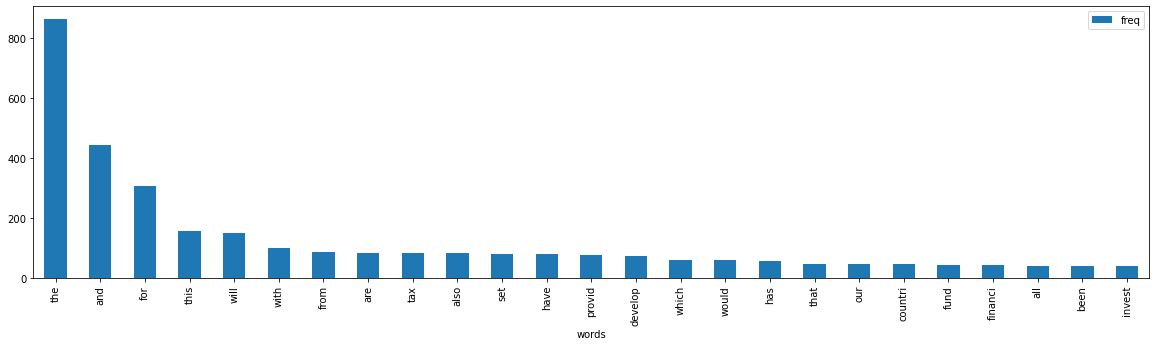

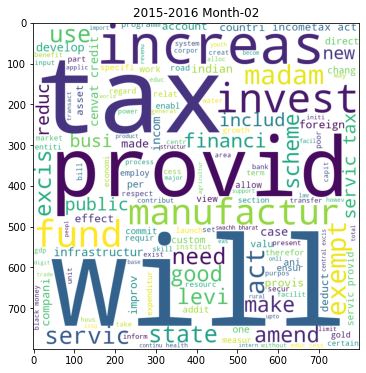

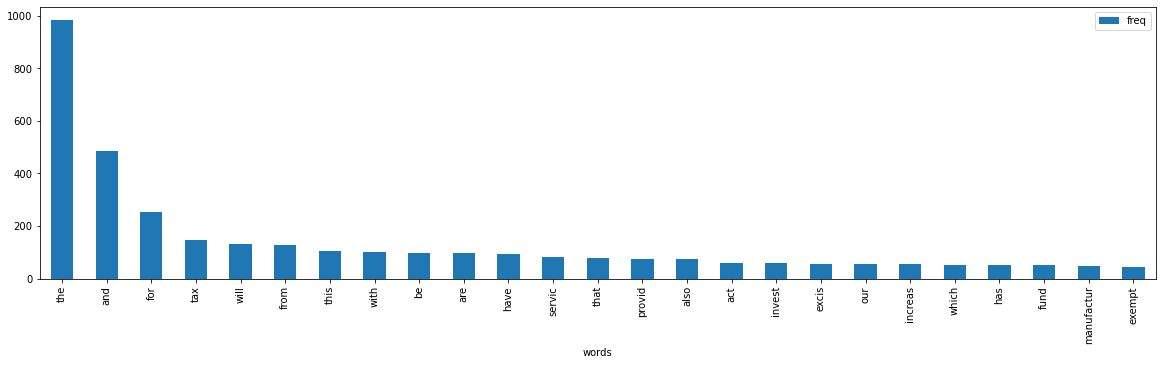

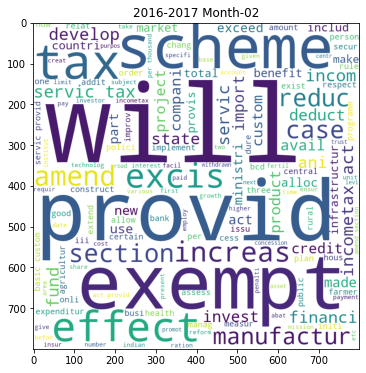

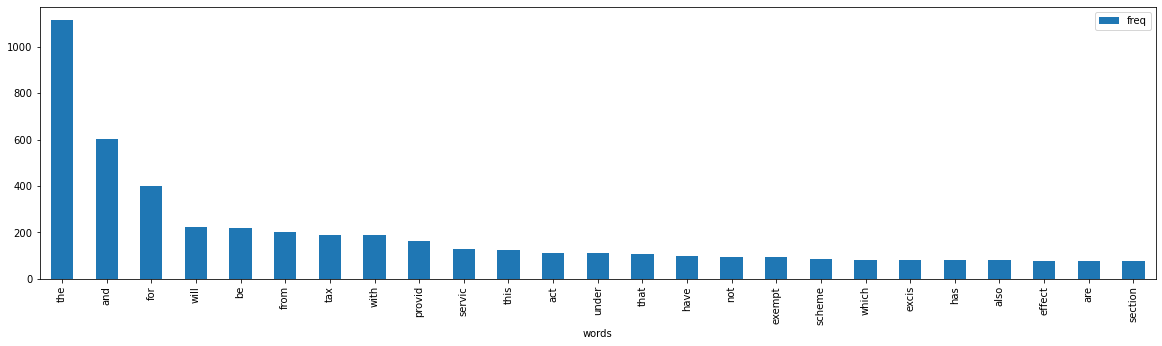

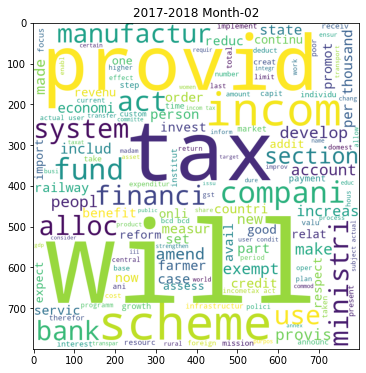

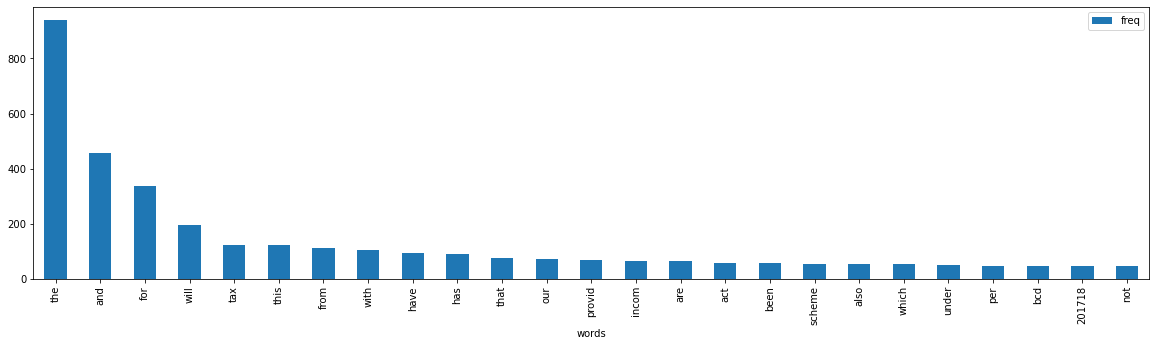

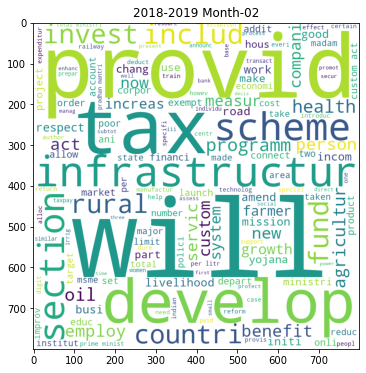

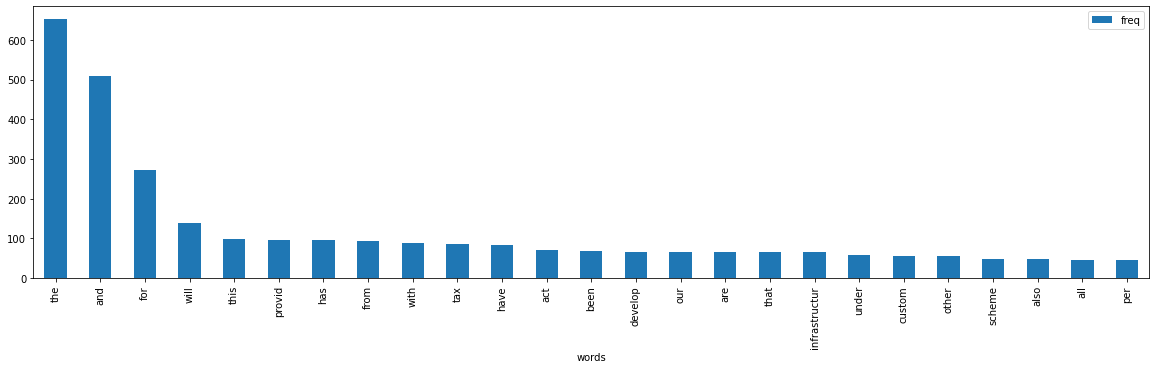

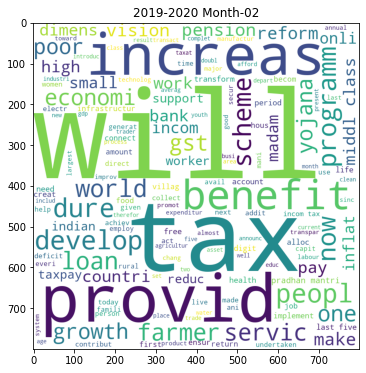

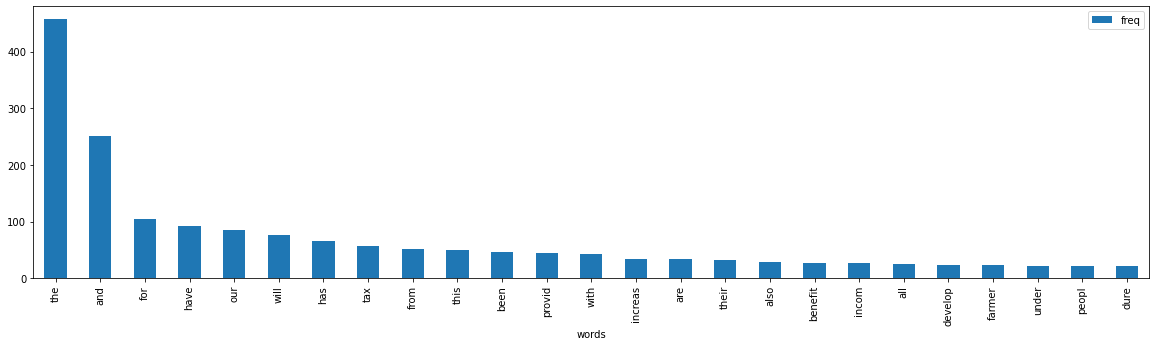

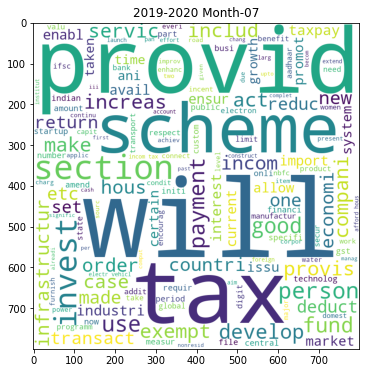

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
dtype: object

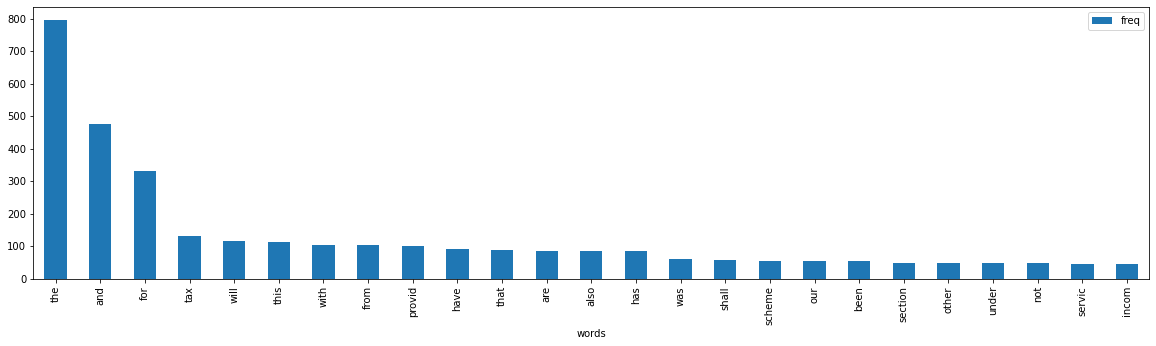

In [54]:
df_files.apply(lambda row : file(row) ,axis=1)

In [55]:
df_sent

,Budget_Year-Month,Finance_Minister,Sentance,Polarity,sentiment,Sector,Topic
0,2010-2011 Month-02,Pranab Mukherjee,2009 when present the interim februari and the...,-0.3818,Negative,Others,invest
1,2010-2011 Month-02,Pranab Mukherjee,growth had start deceler and the busi sentimen...,-0.0772,Negative,Agriculture,invest
2,2010-2011 Month-02,Pranab Mukherjee,the economi capac sustain high growth was unde...,-0.2732,Negative,Agriculture,invest
4,2010-2011 Month-02,Pranab Mukherjee,was not clear also the polici maker mani other...,-0.2924,Negative,Others,invest
5,2010-2011 Month-02,Pranab Mukherjee,what would it impact the growth momentum the i...,0.3818,Positive,Agriculture,invest
...,...,...,...,...,...,...,...
993,2019-2020 Month-07,Nirmala Sitharaman,servic old age home run central state entiti r...,0.0000,Neutral,Others,financi
994,2019-2020 Month-07,Nirmala Sitharaman,servic pension system nps trust it member agai...,0.5106,Positive,Others,alloc
995,2019-2020 Month-07,Nirmala Sitharaman,rehabilitationtherapycounsel servic rehabilit ...,0.0000,Neutral,Others,fund
996,2019-2020 Month-07,Nirmala Sitharaman,admiss circus danc theatr etc have admiss tick...,0.0000,Neutral,Others,tax


In [56]:
df_sent.groupby(['Budget_Year-Month','Finance_Minister','sentiment'])['sentiment'].count()

Budget_Year-Month   Finance_Minister     sentiment
2010-2011 Month-02  Pranab Mukherjee     Negative      42
                                         Neutral      392
                                         Positive     264
2011-2012 Month-02  Pranab Mukherjee     Negative      69
                                         Neutral      470
                                         Positive     252
2012-2013 Month-03  Pranab Mukherjee     Negative      63
                                         Neutral      462
                                         Positive     262
2013-2014 Month-02  P. Chidambaram       Negative      47
                                         Neutral      486
                                         Positive     264
2014-2015 Month-02  P. Chidambaram       Negative      34
                                         Neutral      195
                                         Positive     123
2014-2015 Month-07  Arun Jaitley         Negative      85
                     

In [57]:
type(df_new)


NameError: name 'df_new' is not defined

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df_files['Polarity'] = [analyzer.polarity_scores(x)['compound'] for x in df_files['Text']]